In [312]:
import pandas as pd                              #pd for dataframe,read docs e.t.c
import seaborn as sns                            #sns for Visalization of plots e.t.c
import numpy as np                               #np for complex math conversions e.t.c
from sklearn.preprocessing import MinMaxScaler   #for Normalizing data from 0 to 1 e.t.c
import statsmodels.api as sm                     #sm for qqplot e.t.c
import statsmodels.formula.api as smf            #smf for creating ML model e.t.c
import matplotlib.pyplot as plt                  #plt for Visualization of plots e.t.c

In [313]:
#loading Dataset
corolla= pd.read_excel("C:\\Users\\Hi\\Desktop\\ToyotaCorolla.xlsx")
corolla.shape

(1436, 38)

In [314]:
#[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [315]:
#slecting specified columns for price prediction
df1=corolla[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

# Permforming EDA

In [316]:
df1.shape

(1436, 9)

In [317]:
df1.describe() #Description of all the columns no.of counts, mean e.t.c

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [318]:
df1.info() #there are no NA values to impute or remove

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [319]:
from scipy import stats
dfzz=stats.zscore(df1) #converting data to zscores to remove outliers

df_abs=np.abs(dfzz) #converting to absoulte values |vals| 
df_filter=(df_abs<3).all(axis=1) #removing outliers which are above +3 and below -3
df_filter

0       True
1       True
2       True
3       True
4       True
        ... 
1431    True
1432    True
1433    True
1434    True
1435    True
Length: 1436, dtype: bool

In [320]:
df=df1[df_filter] #getting filtered data points without outliers

In [321]:
df.shape #we can see that 106 rows which were outliers have been removed , removing,replacing or retaining outliers to be done by consulting domain experts

(1330, 9)

In [322]:
df

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [323]:
df.corr() #Gears correlation 'r' can be seen as a constant, removing or retaining Gears column is insignificant

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.885765,-0.593380,0.204240,0.039781,0.183446,NaN,0.051608,0.483469
Age_08_04,-0.885765,1.000000,0.514762,-0.091991,-0.048811,-0.127917,NaN,-0.093871,-0.428461
KM,-0.593380,0.514762,1.000000,-0.285734,0.313393,-0.021665,NaN,0.318500,0.029940
HP,0.204240,-0.091991,-0.285734,1.000000,0.055884,0.151938,NaN,-0.386229,0.008234
cc,0.039781,-0.048811,0.313393,0.055884,1.000000,0.137848,NaN,0.635694,0.686791
Doors,0.183446,-0.127917,-0.021665,0.151938,0.137848,1.000000,NaN,0.100945,0.411108
Gears,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quarterly_Tax,0.051608,-0.093871,0.318500,-0.386229,0.635694,0.100945,NaN,1.000000,0.578068
Weight,0.483469,-0.428461,0.029940,0.008234,0.686791,0.411108,NaN,0.578068,1.000000


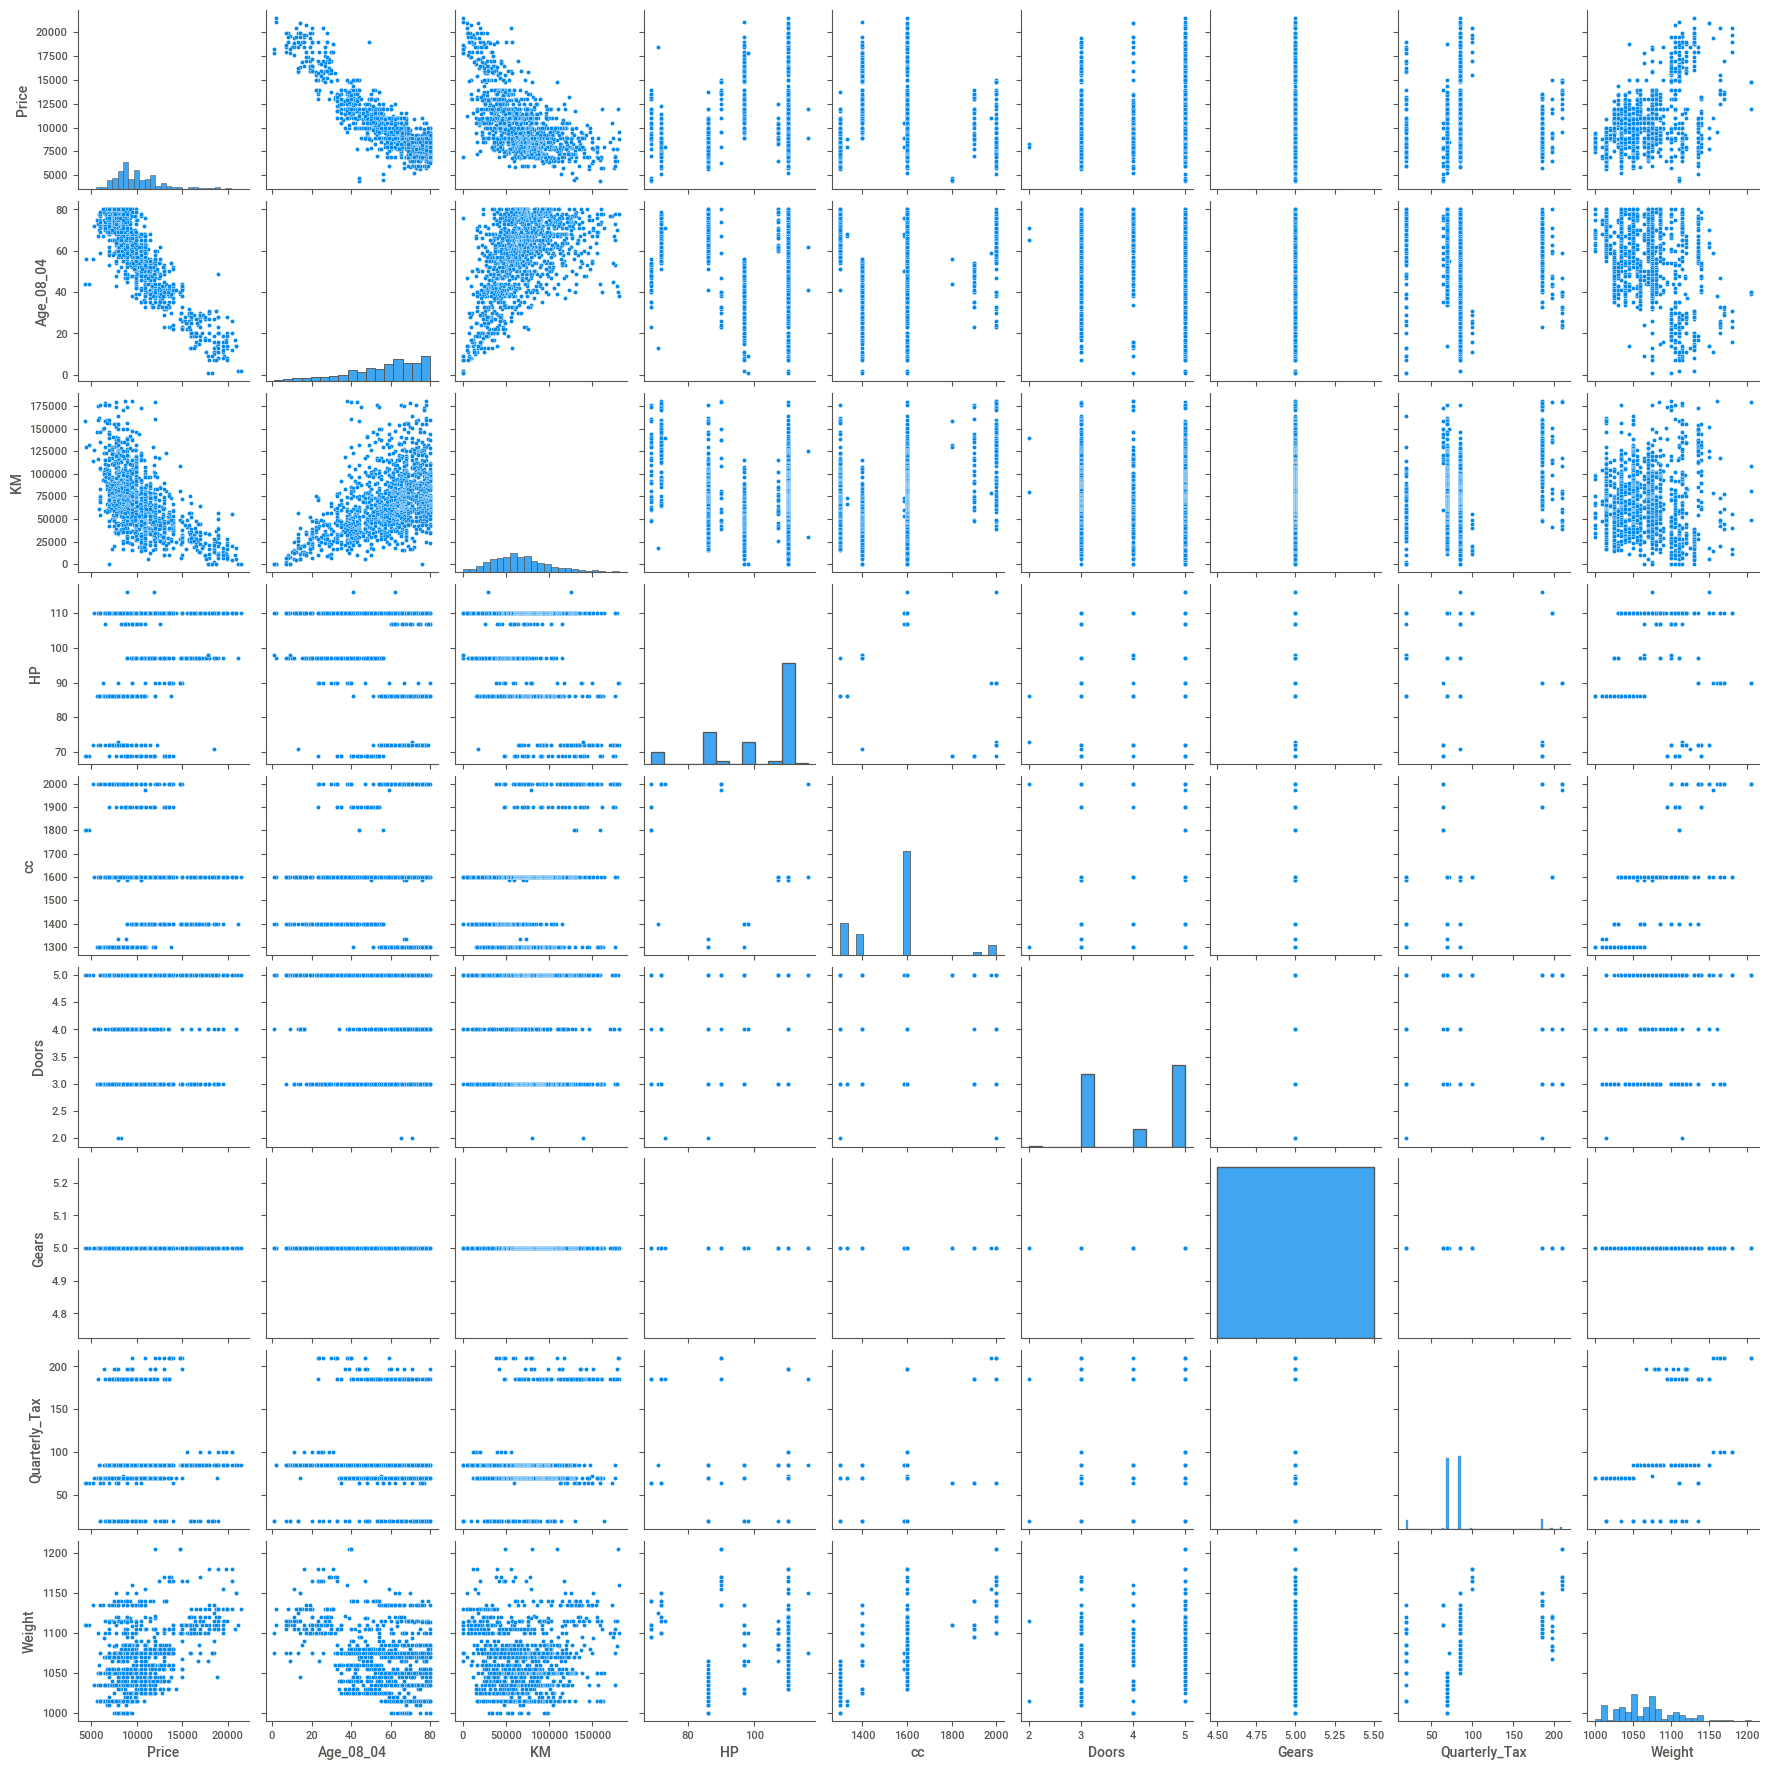

In [324]:
sns.pairplot(df,height=2) #here is pairplot which shows scatterplot which shows relationship between 2 columns 

# Checking for Multi-Collinearity between Independent Variables using Correlation

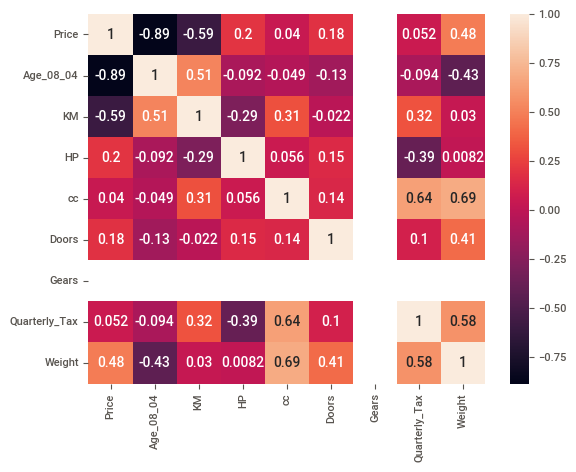

In [325]:
sns.heatmap(df.corr(),annot=True); #it is evident that Multicollinearity between independent variables is not present hence no need of further analysis for VIF and simple L.R between independent variables

In [326]:
#drop Gears column as the correlation between Price and Gears= 0
df2=df.drop('Gears',axis=1)
df2.head()

,Price,Age_08_04,KM,HP,cc,Doors,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,210,1165
1,13750,23,72937,90,2000,3,210,1165
2,13950,24,41711,90,2000,3,210,1165
3,14950,26,48000,90,2000,3,210,1165
4,13750,30,38500,90,2000,3,210,1170


In [327]:
import sweetviz as sv
sweet_report=sv.analyze(df2)
sweet_report.show_html('Corolla_Report.html') # a summary level report of EDA

                                             |          | [  0%]   00:00 -> (? left)

Report Corolla_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [328]:
norm= MinMaxScaler(feature_range=(0,1)) # Normalizing Data 
columns= df2.columns
d=norm.fit_transform(df2)
normdf=pd.DataFrame(d,columns=columns)
normdf

,Price,Age_08_04,KM,HP,cc,Doors,Quarterly_Tax,Weight
0,0.533528,0.278481,0.260107,0.446809,1.000000,0.333333,1.00000,0.804878
1,0.548105,0.278481,0.403771,0.446809,1.000000,0.333333,1.00000,0.804878
2,0.559767,0.291139,0.230905,0.446809,1.000000,0.333333,1.00000,0.804878
3,0.618076,0.316456,0.265721,0.446809,1.000000,0.333333,1.00000,0.804878
4,0.548105,0.367089,0.213129,0.446809,1.000000,0.333333,1.00000,0.829268
...,...,...,...,...,...,...,...,...
1325,0.183673,0.860759,0.113725,0.361702,0.000000,0.333333,0.26178,0.121951
1326,0.378717,0.898734,0.105178,0.361702,0.000000,0.333333,0.26178,0.073171
1327,0.241983,0.886076,0.094194,0.361702,0.000000,0.333333,0.26178,0.073171
1328,0.169096,0.873418,0.093641,0.361702,0.000000,0.333333,0.26178,0.073171


In [329]:
import sweetviz as sv   #normalized detailed EDA report of the dataset 
sweet_report=sv.analyze(normdf)
sweet_report.show_html('Normalized df Report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Normalized df Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [330]:
normdf.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Quarterly_Tax',
       'Weight'],
      dtype='object')

# Model1 Creation

In [406]:
#not including Gears column because of 0.05 correlation and there is no collinearty between the independent variable hence no analysis for VIF
model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight',data=normdf).fit()

In [332]:
model.params #model parameters the formula will be Price'y'=Age_08_04.(x1)+KM.(x2)+HP.(x3)+cc.(x4)+Doors.(x5)+Quarterly_Tax.(x6)+Weight.(x7)+Intercept , here x1,x2 are columns of 1 record

Intercept        0.677979
Age_08_04       -0.507272
KM              -0.179678
HP               0.070899
cc              -0.122042
Doors           -0.020331
Quarterly_Tax    0.009683
Weight           0.341489
dtype: float64

In [333]:
print(model.tvalues,'/n',model.pvalues)
#here Quarterly_Tax- column pvalue is 0.5>0.05 accept null hypothesis stating price is not dependent on Quarterly_Tax variables

Intercept        55.734661
Age_08_04       -44.064939
KM              -13.658639
HP                8.083607
cc               -9.246152
Doors            -2.996562
Quarterly_Tax     0.601924
Weight           17.130917
dtype: float64 /n Intercept         0.000000e+00
Age_08_04        1.055969e-261
KM                7.893020e-40
HP                1.407485e-15
cc                9.035165e-20
Doors             2.781323e-03
Quarterly_Tax     5.473279e-01
Weight            1.441663e-59
dtype: float64


In [334]:
model.rsquared,model.rsquared_adj,model.aic

(0.8570876990754327, 0.856330977361006, -3397.182212365614)

# Normality of Residuals(Q-Q Plot)


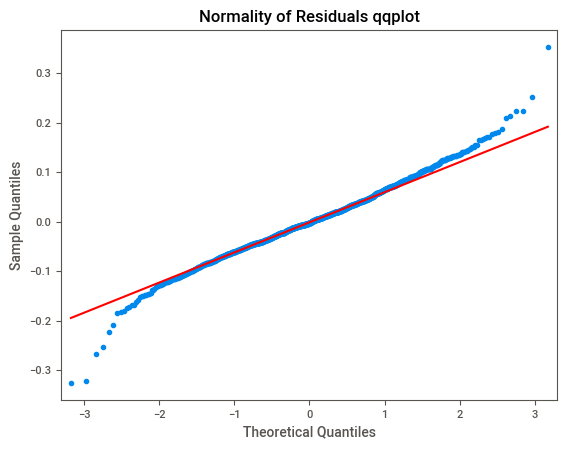

In [335]:
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normality of Residuals qqplot")
plt.show()

# Residuals for homoscedasticity

In [336]:
#Residuals vs Fitted Values(predicted)
def get_standardized_values(vals):
    return (vals-vals.mean())/vals.std()

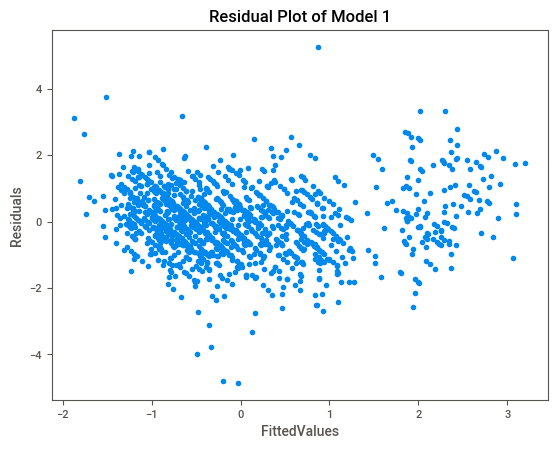

In [337]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title("Residual Plot of Model 1")
plt.xlabel("FittedValues")
plt.ylabel("Residuals")
plt.show()

eval_env: 1


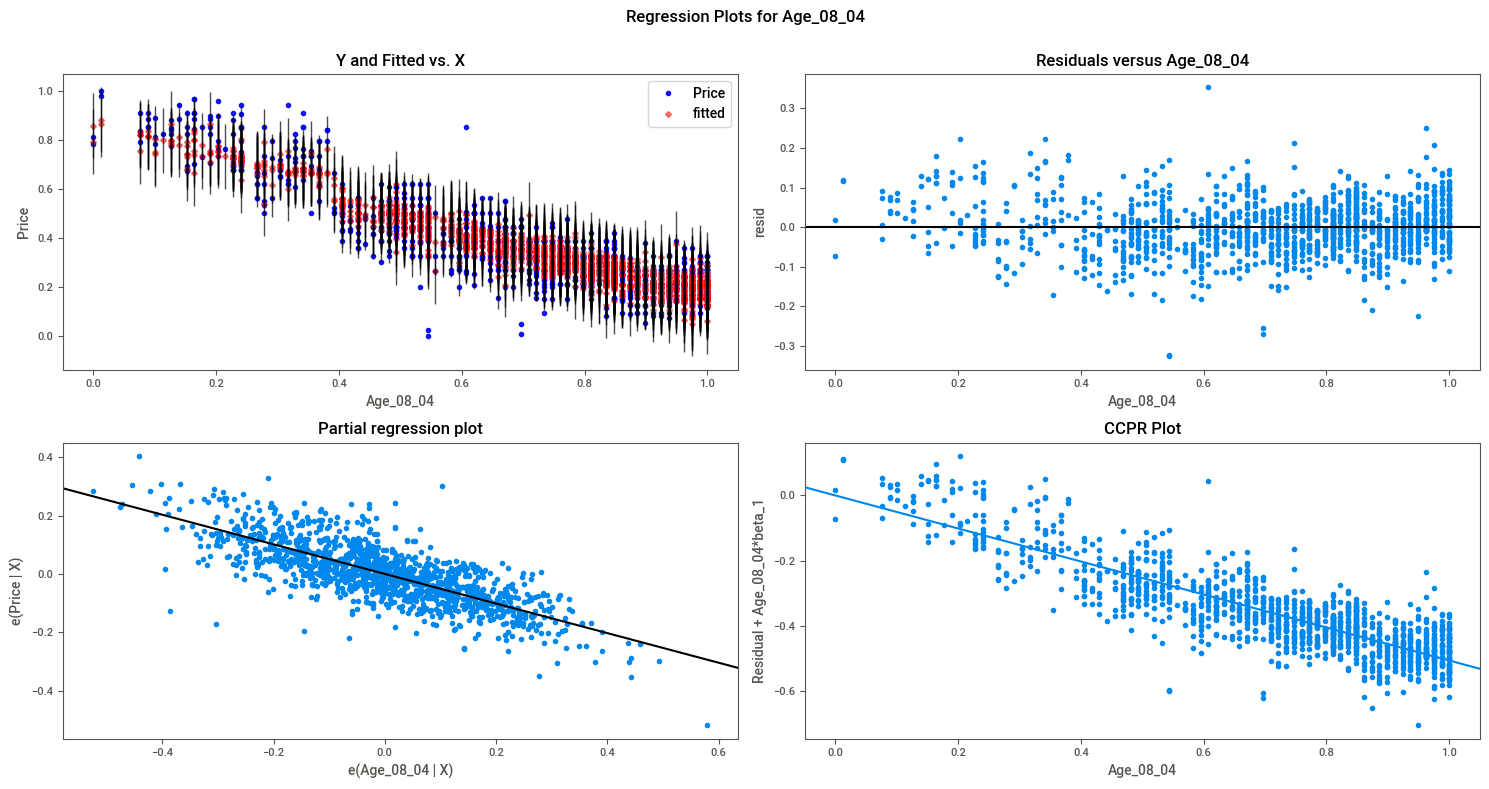

In [338]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Age_08_04",fig=fig) # Residuals vs Age_08_04 column
plt.show()

In [339]:
normdf.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Quarterly_Tax',
       'Weight'],
      dtype='object')

eval_env: 1


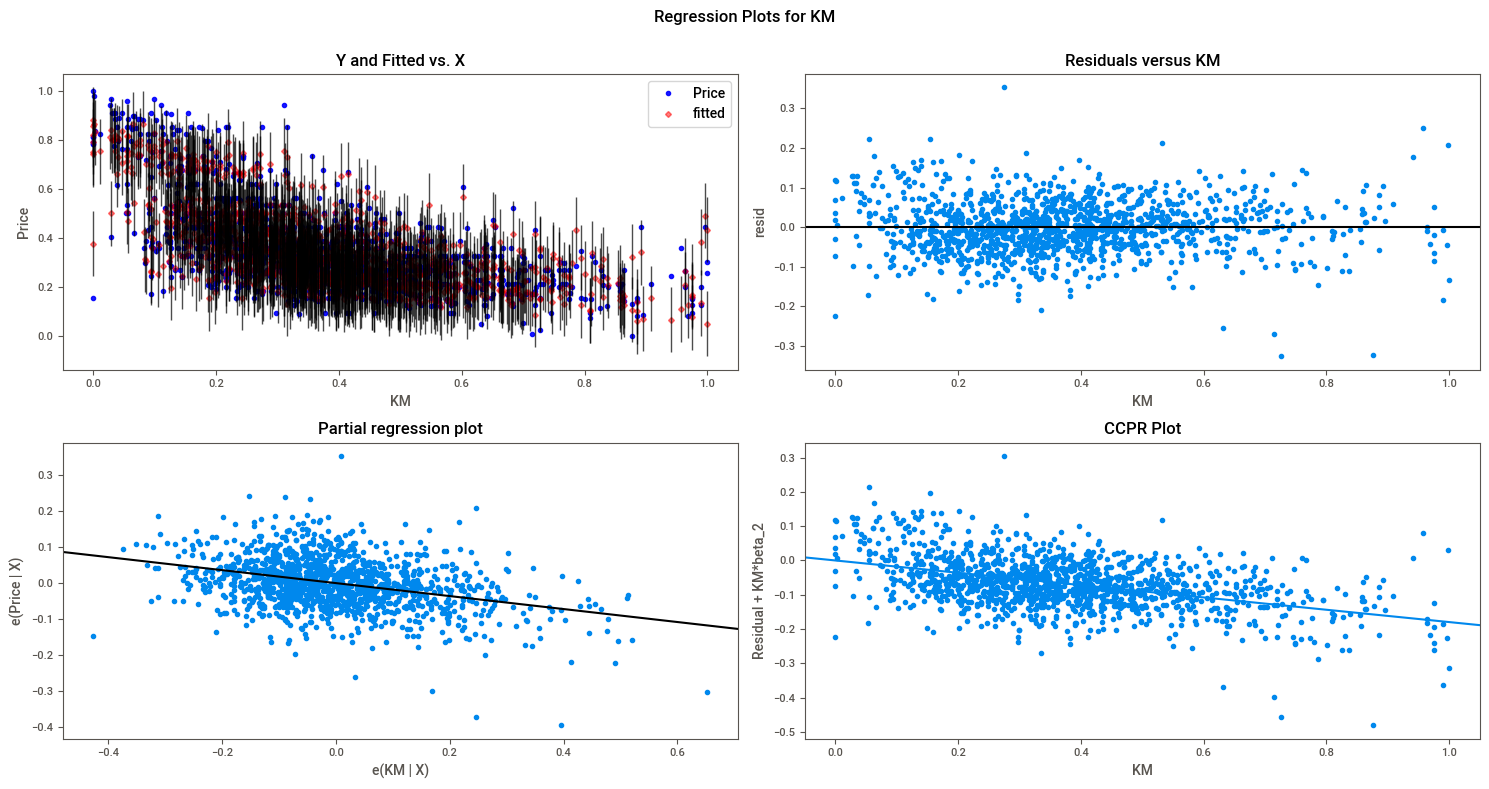

In [340]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'KM',fig=fig) #Residuals vs KM column
plt.show()


eval_env: 1


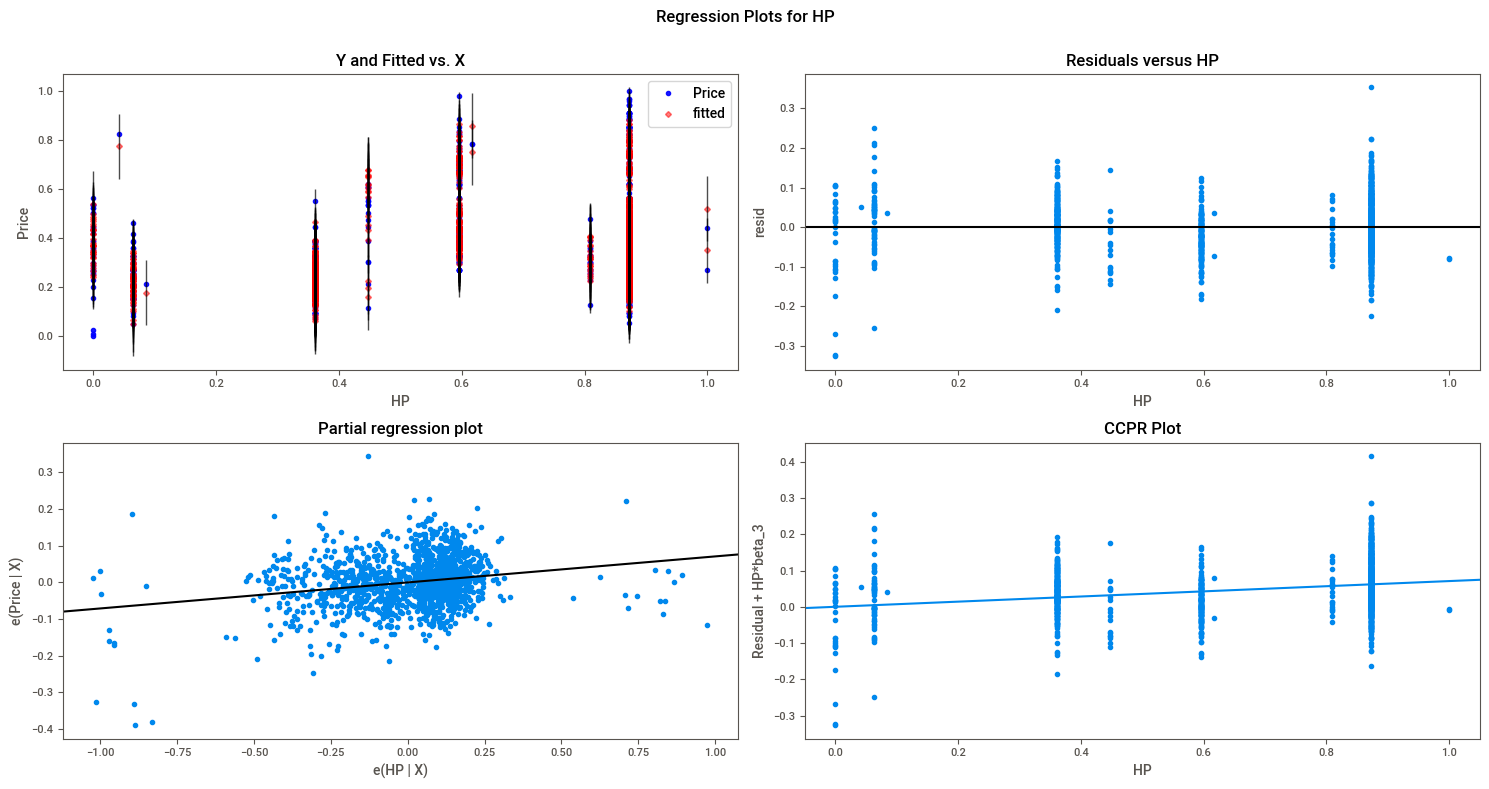

In [341]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"HP",fig=fig) #Residuals vs HP column
plt.show()

eval_env: 1


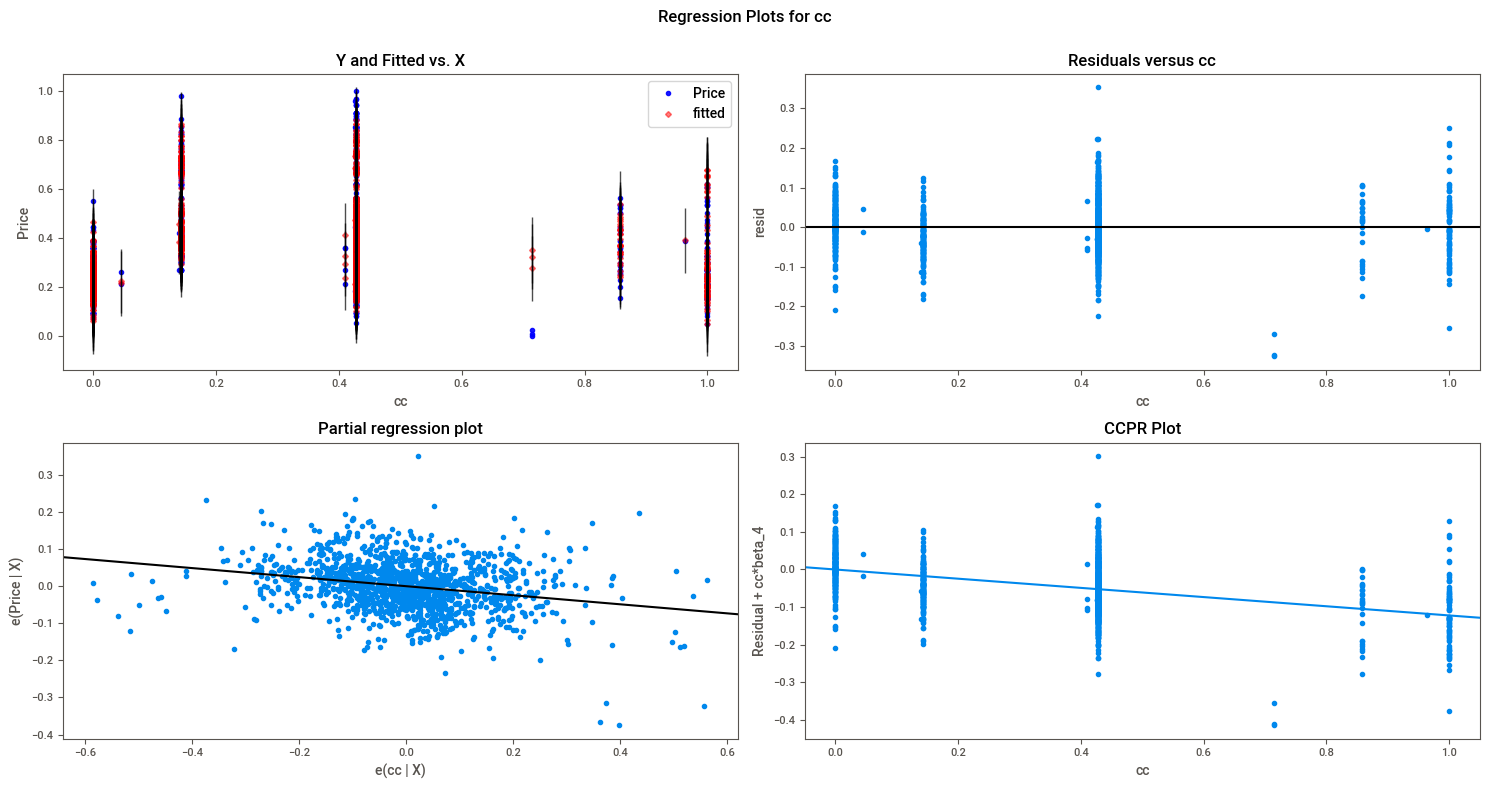

In [342]:
fig=plt.figure(figsize=(15,8))
fig= sm.graphics.plot_regress_exog(model,"cc",fig=fig) #Residuals vs cc column
plt.show()

eval_env: 1


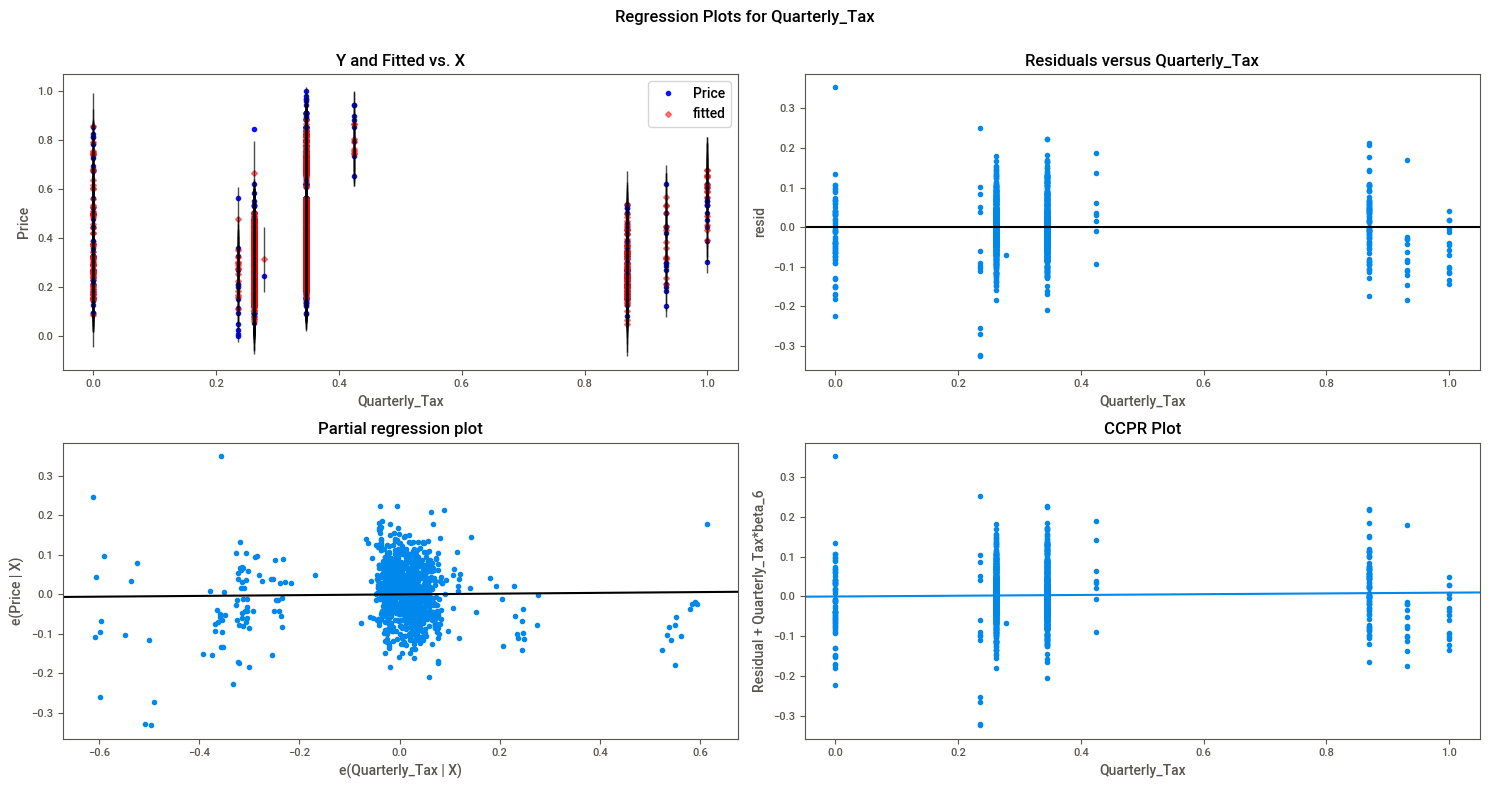

In [343]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Quarterly_Tax",fig=fig) #Resdiuals vs Quarterly_Tax , here we can see in CCPR plot there is barely any affect the regression line is =0.0000
plt.show()

eval_env: 1


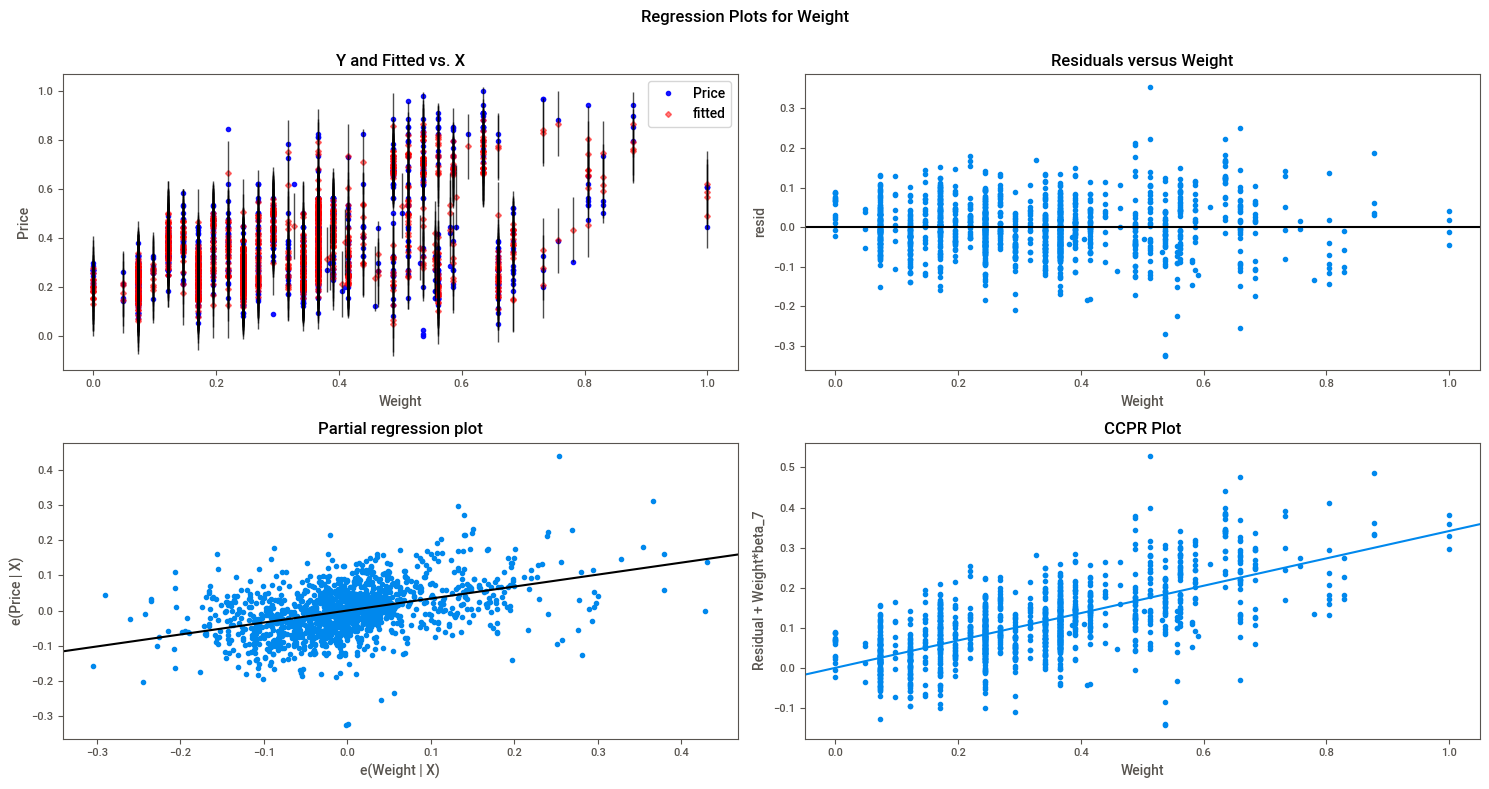

In [344]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Weight",fig=fig) #Residuals vs Weight
plt.show()

eval_env: 1


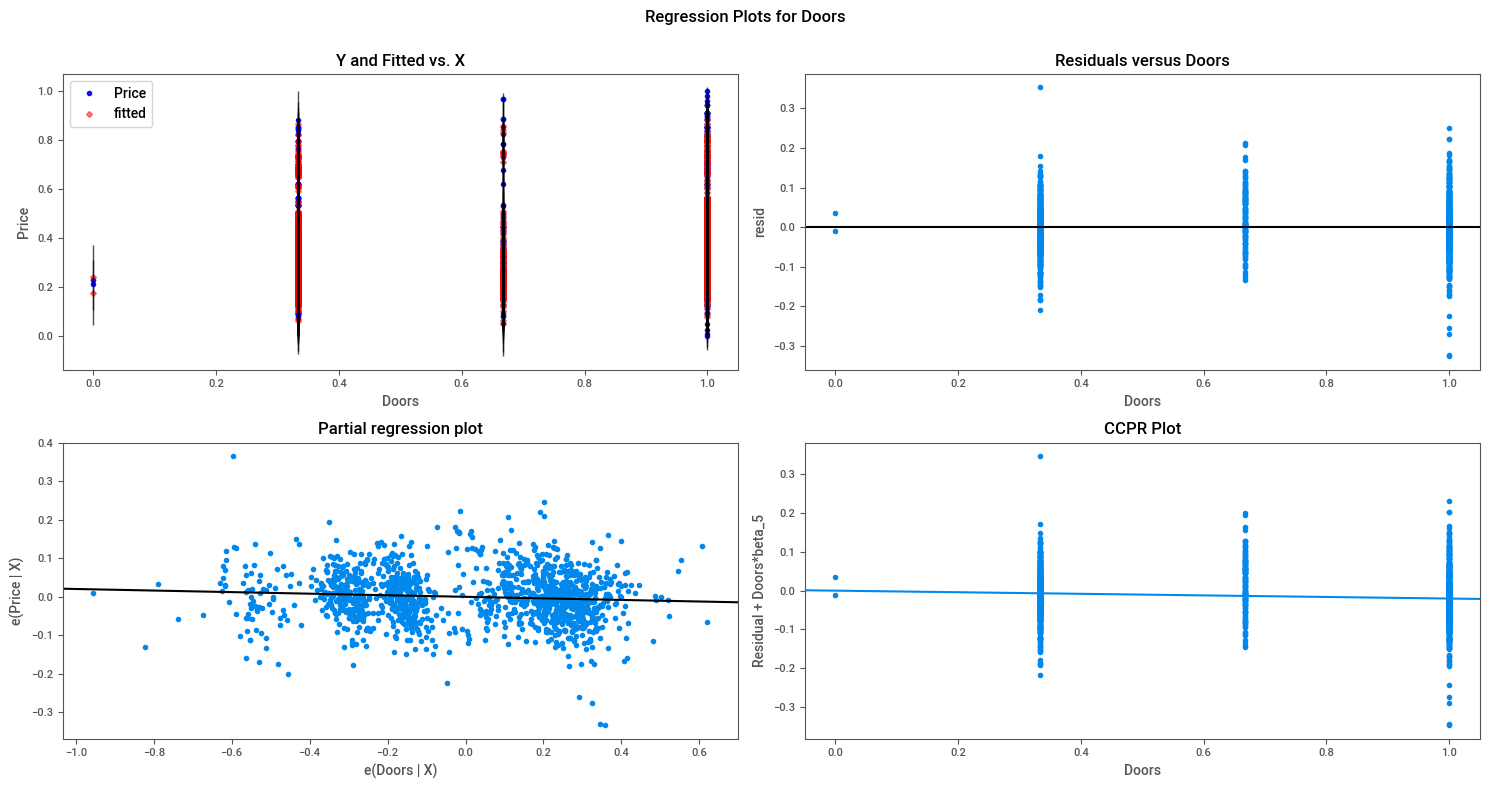

In [345]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Doors",fig=fig) #Residuals vs Doors , here too we can see barely any change in CCPR plot which is = 0.000
plt.show()

In [346]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

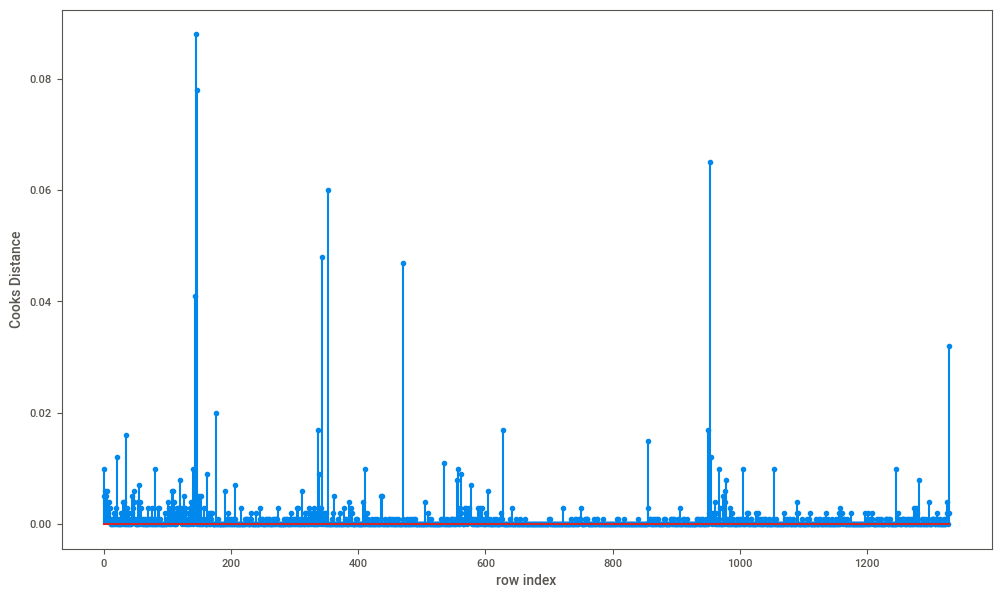

In [347]:
#cooks distance using stem plot 
fig=plt.subplots(figsize=(12,7))
plt.stem(np.arange(len(normdf)),np.round(c,3))
plt.ylabel("Cooks Distance")
plt.xlabel("row index")
plt.show() #Here we can see that the influencing data points are below 1 hence there are no High Influencing points to remove in dataset

In [348]:
normdf.shape

(1330, 8)

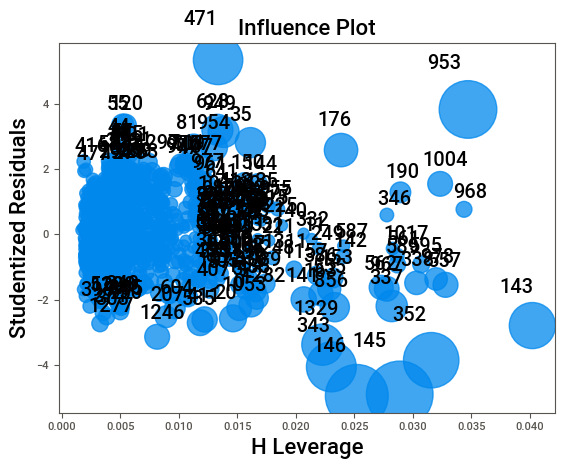

In [349]:
from statsmodels.graphics.regressionplots import influence_plot # Bubble plot shows high influencing points with data point nos. as per columns with bigger bubble it shows how much its affecting the model
influence_plot(model)
plt.show()

In [350]:
from sklearn.metrics import mean_squared_error

In [351]:
mse_m1= mean_squared_error(normdf.Price,model.fittedvalues) #checking for RMSE value 
rmse_m1=math.sqrt(mse_m1)
print("the difference between actual and predicted values of model1 is :---",rmse_m1)


the difference between actual and predicted values of model1 is :--- 0.06706521727533687


# Model2 Building by dropping Quarterly_Tax column as its pvalue was >0.05

In [352]:
normdf1=normdf.drop('Quarterly_Tax',axis=1)

In [353]:
normdf1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Weight
0,0.533528,0.278481,0.260107,0.446809,1.0,0.333333,0.804878
1,0.548105,0.278481,0.403771,0.446809,1.0,0.333333,0.804878
2,0.559767,0.291139,0.230905,0.446809,1.0,0.333333,0.804878
3,0.618076,0.316456,0.265721,0.446809,1.0,0.333333,0.804878
4,0.548105,0.367089,0.213129,0.446809,1.0,0.333333,0.829268


In [354]:
normdf1

,Price,Age_08_04,KM,HP,cc,Doors,Weight
0,0.533528,0.278481,0.260107,0.446809,1.000000,0.333333,0.804878
1,0.548105,0.278481,0.403771,0.446809,1.000000,0.333333,0.804878
2,0.559767,0.291139,0.230905,0.446809,1.000000,0.333333,0.804878
3,0.618076,0.316456,0.265721,0.446809,1.000000,0.333333,0.804878
4,0.548105,0.367089,0.213129,0.446809,1.000000,0.333333,0.829268
...,...,...,...,...,...,...,...
1325,0.183673,0.860759,0.113725,0.361702,0.000000,0.333333,0.121951
1326,0.378717,0.898734,0.105178,0.361702,0.000000,0.333333,0.073171
1327,0.241983,0.886076,0.094194,0.361702,0.000000,0.333333,0.073171
1328,0.169096,0.873418,0.093641,0.361702,0.000000,0.333333,0.073171


In [355]:
#Model creation
model2=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Weight',data=normdf1).fit()

In [356]:
print(model2.rsquared,model2.aic,'-----', model.rsquared,model.aic)
#after removing Quarterly_Tax column there is barely any change in accuracy

0.8570485319677515 -3398.8177572705736 ----- 0.8570876990754327 -3397.182212365614


In [357]:
#Cook's Distance 
model2_influence=model2.get_influence()
(c1,_)=model2_influence.cooks_distance

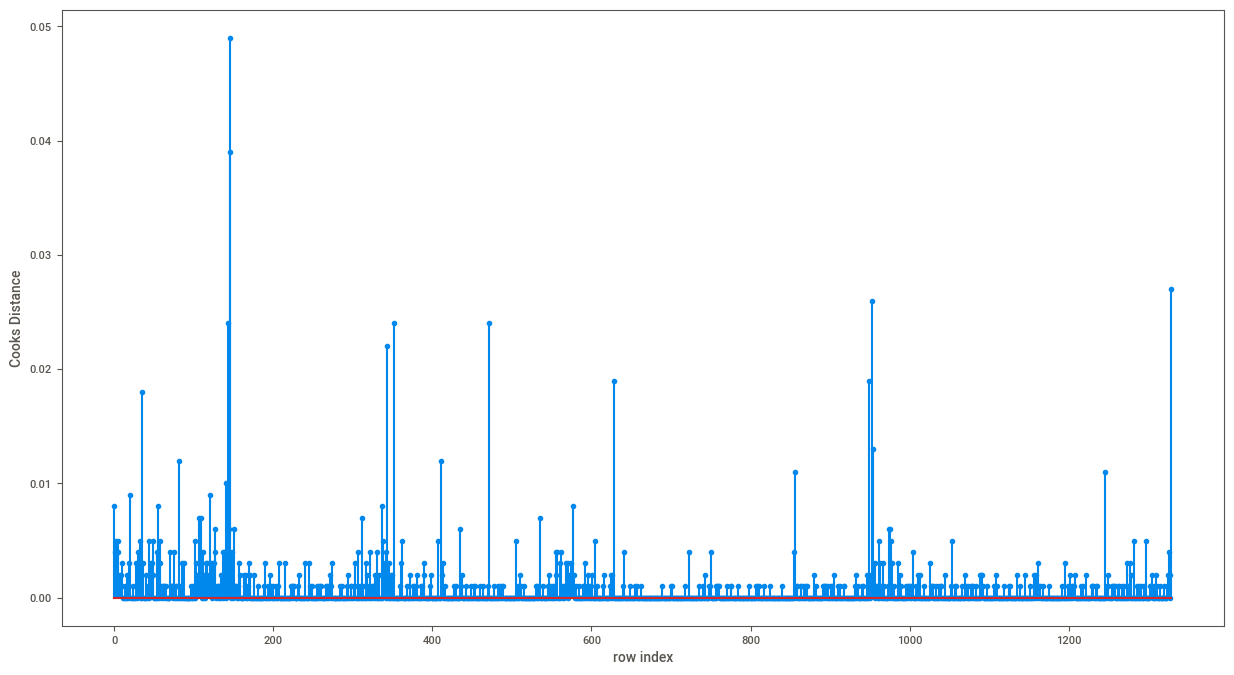

In [358]:
fig=plt.subplots(figsize=(15,8))
plt.stem(np.arange(len(normdf1)),np.round(c1,3))
plt.xlabel("row index")
plt.ylabel("Cooks Distance")
plt.show()
#the datapoint dropped from 0.08 to 0.05 in Cooks distance after removing Quarterly_Tax column

In [359]:
model2.tvalues , '\n', model2.pvalues #no major changes just insignificant changes in tvalues and p values

(Intercept    61.795139
 Age_08_04   -44.154656
 KM          -13.661637
 HP            9.016237
 cc           -9.911505
 Doors        -3.003471
 Weight       17.639943
 dtype: float64,
 '\n',
 Intercept     0.000000e+00
 Age_08_04    1.821975e-262
 KM            7.581300e-40
 HP            6.656496e-19
 cc            2.186361e-22
 Doors         2.719329e-03
 Weight        1.037500e-62
 dtype: float64)

In [360]:
model2.rsquared, model2.aic, '--------', model.rsquared,model.aic 
#comparing model2 and 1st model R2 coefficient of determination to get the accuracy difference in both model

(0.8570485319677515,
 -3398.8177572705736,
 '--------',
 0.8570876990754327,
 -3397.182212365614)

In [361]:
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

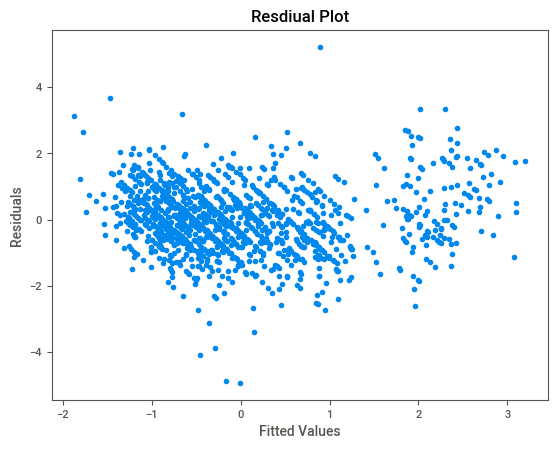

In [362]:
plt.scatter(get_standardized_values(model2.fittedvalues),get_standardized_values(model2.resid)) #scatter plot
plt.title("Resdiual Plot")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

In [363]:
mse_m2= mean_squared_error(normdf.Price,model2.fittedvalues) #checking for RMSE value 
rmse_m2=math.sqrt(mse_m2)
print("the difference between actual and predicted values of model2 is :---",rmse_m2)



the difference between actual and predicted values of model2 is :--- 0.06707440672446038


# Creating Model 3 to avoid pattern in Residuals vs fitted Values , so transforming datapoints by using inverse tan Transformation

In [364]:
import math
normdf1

,Price,Age_08_04,KM,HP,cc,Doors,Weight
0,0.533528,0.278481,0.260107,0.446809,1.000000,0.333333,0.804878
1,0.548105,0.278481,0.403771,0.446809,1.000000,0.333333,0.804878
2,0.559767,0.291139,0.230905,0.446809,1.000000,0.333333,0.804878
3,0.618076,0.316456,0.265721,0.446809,1.000000,0.333333,0.804878
4,0.548105,0.367089,0.213129,0.446809,1.000000,0.333333,0.829268
...,...,...,...,...,...,...,...
1325,0.183673,0.860759,0.113725,0.361702,0.000000,0.333333,0.121951
1326,0.378717,0.898734,0.105178,0.361702,0.000000,0.333333,0.073171
1327,0.241983,0.886076,0.094194,0.361702,0.000000,0.333333,0.073171
1328,0.169096,0.873418,0.093641,0.361702,0.000000,0.333333,0.073171


In [365]:
normdf['Age_08_04'].apply(lambda x: float(x))
normdf['KM'].apply(lambda x: float(x))
normdf['HP'].apply(lambda x: float(x))
normdf['cc'].apply(lambda x: float(x))
normdf['Doors'].apply(lambda x: float(x))
normdf['Weight'].apply(lambda x: float(x))


normdf1['Age_08_04']= np.arctan(normdf['Age_08_04']) #tranforming data to inverse tan on  all the columns to avoid pattern in residuals vs fitted Values
normdf1['KM']=np.arctan(normdf['KM'])
normdf1['HP']=np.arctan(normdf['HP'])
normdf1['cc']=np.arctan(normdf['cc'])
normdf1['Doors']=np.arctan(normdf['Doors'])
normdf1['Weight']=np.arctan(normdf['Weight'])


In [366]:
normdf1.isnull().sum()

Price        0
Age_08_04    0
KM           0
HP           0
cc           0
Doors        0
Weight       0
dtype: int64

In [367]:
model3=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Weight',data=normdf1).fit()

In [368]:
model3.params

Intercept    0.763423
Age_08_04   -0.732314
KM          -0.206807
HP           0.086488
cc          -0.099355
Doors       -0.014573
Weight       0.311824
dtype: float64

In [369]:
model3.tvalues , model3.pvalues

(Intercept    60.990888
 Age_08_04   -45.472082
 KM          -13.240257
 HP            8.795708
 cc           -7.074990
 Doors        -1.523933
 Weight       13.886760
 dtype: float64,
 Intercept     0.000000e+00
 Age_08_04    1.182555e-272
 KM            1.140098e-37
 HP            4.343628e-18
 cc            2.415986e-12
 Doors         1.277644e-01
 Weight        4.963881e-41
 dtype: float64)

In [370]:
model3.rsquared, model2.rsquared, model.rsquared #comparing all the 3 models for Rsquared

(0.863295773704572, 0.8570485319677515, 0.8570876990754327)

# Residual Plot for Homoscedasticity


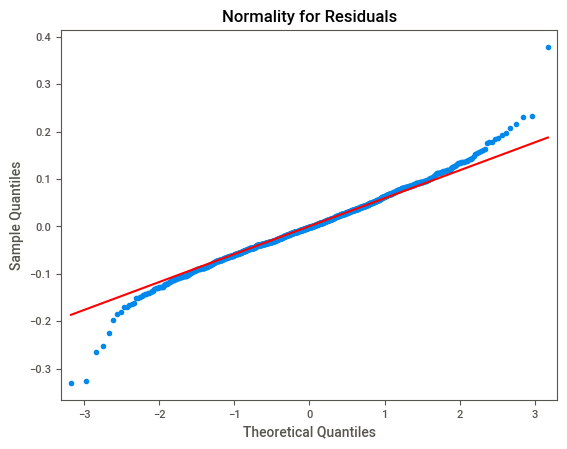

In [371]:
qqplot3=sm.qqplot(model3.resid,line='q')
plt.title("Normality for Residuals")
plt.show()


# Residual Analysis

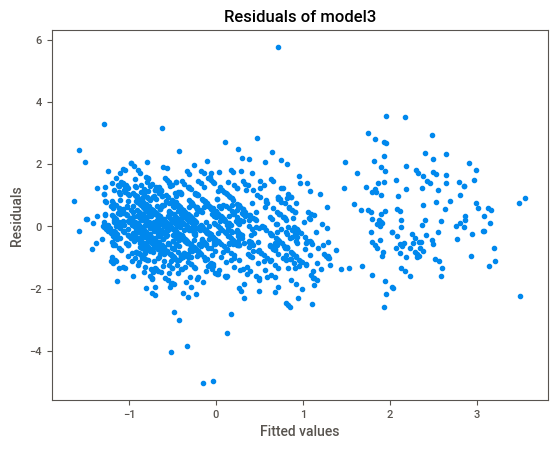

In [372]:
plt.scatter(get_standardized_values(model3.fittedvalues), get_standardized_values(model3.resid))
plt.title("Residuals of model3")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show() 
#Now Residuals are randomly distributed and there is no pattern so we can go with model3 even though accuracy got dipped to 74%

In [373]:
#!pip install tabulate
from tabulate import tabulate

In [374]:
#Creating Table to compare all model's Rsquared(model validation accuracy),AIC(Akaik Information Criteria <<< for Good Model),BIC(Bayesian Info Criteria<<< for Good Model)
table=[['Model no.','R-Squared','Adj R-Squared','AIC','BIC','Reason For Accept/Reject Model'],
       ['Model 1 ❌     ',model.rsquared,model.rsquared_adj,model.aic,model.bic,'Pattern in e-(y) predict and pvalue of Tax >0.05'],
       ['Model 2 ❌     ',model2.rsquared,model2.rsquared_adj,model2.aic,model2.bic,'Pattern in e vs y predict '],
       ['Model 3 ✔️  ',model3.rsquared,model3.rsquared_adj,model3.aic,model3.bic,'Accuracy is low but no pattern in Residuals plot']]

In [375]:
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid', showindex=range(1,4)))

╒════╤═════════════╤═════════════╤═════════════════╤══════════╤══════════╤══════════════════════════════════════════════════╕
│    │ Model no.   │   R-Squared │   Adj R-Squared │      AIC │      BIC │ Reason For Accept/Reject Model                   │
╞════╪═════════════╪═════════════╪═════════════════╪══════════╪══════════╪══════════════════════════════════════════════════╡
│  1 │ Model 1 ❌  │    0.857088 │        0.856331 │ -3397.18 │ -3355.64 │ Pattern in e-(y) predict and pvalue of Tax >0.05 │
├────┼─────────────┼─────────────┼─────────────────┼──────────┼──────────┼──────────────────────────────────────────────────┤
│  2 │ Model 2 ❌  │    0.857049 │        0.8564   │ -3398.82 │ -3362.47 │ Pattern in e vs y predict                        │
├────┼─────────────┼─────────────┼─────────────────┼──────────┼──────────┼──────────────────────────────────────────────────┤
│  3 │ Model 3 ✔️   │    0.863296 │        0.862676 │ -3458.25 │ -3421.9  │ Accuracy is low but no pattern in Residuals 

In [376]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1392.
Date:                Wed, 30 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:23:41   Log-Likelihood:                 1736.1
No. Observations:                1330   AIC:                            -3458.
Df Residuals:                    1323   BIC:                            -3422.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7634      0.013     60.991      0.000       0.739       0.788
Age_08_04     -0.7323      0.016    -45.472      0.000      -0.764      -0.701
KM            -0.2068      0.016    -13.240      0.000      -0.237      -0.176
HP             0.0865      0.010      8.796      0.000       0.067       0.106
cc            -0.0994      0.014     -7.075      0.000      -0.127      -0.072
Doors         -0.0146      0.010     -1.524      0.128      -0.033       0.004
Weight         0.3118      0.022     13.887      0.000       0.268       0.356
==============================================================================
Omnibus:                       65.826   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.471
Skew:                           0.020   Prob(JB):                     6.65e-50
Kurtosis:                       5.021   Cond. No.                         24.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [377]:
mse_m3= mean_squared_error(normdf.Price,model3.fittedvalues) #checking for RMSE value 
rmse_m3=math.sqrt(mse_m3)
print("the difference between actual and predicted values of model3 is :---",rmse_m3)

the difference between actual and predicted values of model3 is :--- 0.06559239681968419


# Model 4  creation by transforming Data using log1p

In [378]:
normdf1['Age_08_04']= np.log1p(normdf['Age_08_04']) #tranforming data to inverse tan on  all the columns to avoid pattern in residuals vs fitted Values
normdf1['KM']=np.log1p(normdf['KM'])
normdf1['HP']=np.log1p(normdf['HP'])
normdf1['cc']=np.log1p(normdf['cc'])
normdf1['Doors']=np.log1p(normdf['Doors'])
normdf1['Weight']=np.log1p(normdf['Weight'])

In [379]:
normdf

,Price,Age_08_04,KM,HP,cc,Doors,Quarterly_Tax,Weight
0,0.533528,0.278481,0.260107,0.446809,1.000000,0.333333,1.00000,0.804878
1,0.548105,0.278481,0.403771,0.446809,1.000000,0.333333,1.00000,0.804878
2,0.559767,0.291139,0.230905,0.446809,1.000000,0.333333,1.00000,0.804878
3,0.618076,0.316456,0.265721,0.446809,1.000000,0.333333,1.00000,0.804878
4,0.548105,0.367089,0.213129,0.446809,1.000000,0.333333,1.00000,0.829268
...,...,...,...,...,...,...,...,...
1325,0.183673,0.860759,0.113725,0.361702,0.000000,0.333333,0.26178,0.121951
1326,0.378717,0.898734,0.105178,0.361702,0.000000,0.333333,0.26178,0.073171
1327,0.241983,0.886076,0.094194,0.361702,0.000000,0.333333,0.26178,0.073171
1328,0.169096,0.873418,0.093641,0.361702,0.000000,0.333333,0.26178,0.073171


In [380]:
normdf1

,Price,Age_08_04,KM,HP,cc,Doors,Weight
0,0.533528,0.245673,0.231197,0.369360,0.693147,0.287682,0.590493
1,0.548105,0.245673,0.339162,0.369360,0.693147,0.287682,0.590493
2,0.559767,0.255525,0.207750,0.369360,0.693147,0.287682,0.590493
3,0.618076,0.274943,0.235642,0.369360,0.693147,0.287682,0.590493
4,0.548105,0.312683,0.193203,0.369360,0.693147,0.287682,0.603916
...,...,...,...,...,...,...,...
1325,0.183673,0.620985,0.107711,0.308735,0.000000,0.287682,0.115069
1326,0.378717,0.641187,0.100006,0.308735,0.000000,0.287682,0.070618
1327,0.241983,0.634498,0.090018,0.308735,0.000000,0.287682,0.070618
1328,0.169096,0.627764,0.089512,0.308735,0.000000,0.287682,0.070618


In [381]:
model4=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Weight',data=normdf1).fit()

In [382]:
model4.params

Intercept    0.761974
Age_08_04   -0.836096
KM          -0.245315
HP           0.100919
cc          -0.124589
Doors       -0.021642
Weight       0.386910
dtype: float64

In [383]:
model4.tvalues, '\n',model4.pvalues

(Intercept    60.248572
 Age_08_04   -45.278538
 KM          -13.304401
 HP            8.883117
 cc           -7.710180
 Doors        -1.965347
 Weight       14.657207
 dtype: float64,
 '\n',
 Intercept     0.000000e+00
 Age_08_04    3.677778e-271
 KM            5.355794e-38
 HP            2.075180e-18
 cc            2.455917e-14
 Doors         4.958307e-02
 Weight        3.449612e-45
 dtype: float64)

In [384]:
model4.rsquared

0.8623394812176823

# Residual Plot for Homoscedasticity


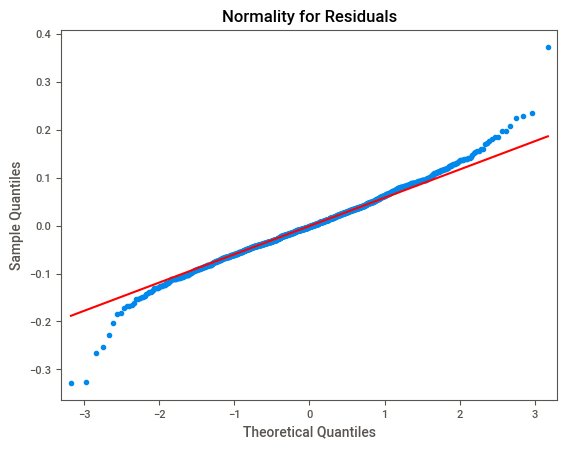

In [385]:
qqplot4=sm.qqplot(model4.resid,line='q')
plt.title("Normality for Residuals")
plt.show()



# Residual Analysis

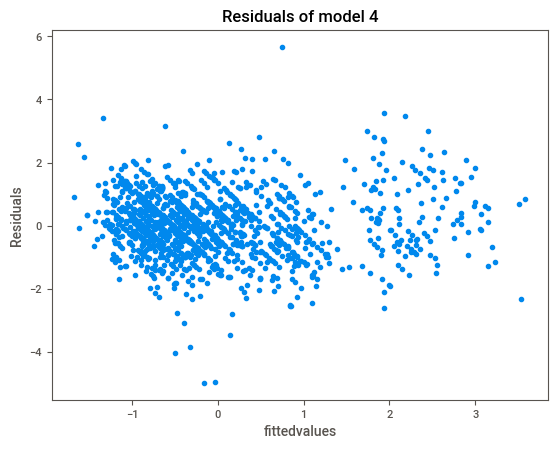

In [386]:
plt.scatter(get_standardized_values(model4.fittedvalues),
           get_standardized_values(model4.resid))
plt.title('Residuals of model 4')
plt.xlabel('fittedvalues')
plt.ylabel('Residuals')
plt.show()

In [387]:

mse_m4= mean_squared_error(normdf.Price,model4.fittedvalues) #checking for RMSE value 
rmse_m4=math.sqrt(mse_m4)
print("the difference between actual and predicted values of model4 is :---",rmse_m4)

the difference between actual and predicted values of model4 is :--- 0.06582141754352634


#Model 5 Creation transforming Dataset 

In [388]:
normdf

,Price,Age_08_04,KM,HP,cc,Doors,Quarterly_Tax,Weight
0,0.533528,0.278481,0.260107,0.446809,1.000000,0.333333,1.00000,0.804878
1,0.548105,0.278481,0.403771,0.446809,1.000000,0.333333,1.00000,0.804878
2,0.559767,0.291139,0.230905,0.446809,1.000000,0.333333,1.00000,0.804878
3,0.618076,0.316456,0.265721,0.446809,1.000000,0.333333,1.00000,0.804878
4,0.548105,0.367089,0.213129,0.446809,1.000000,0.333333,1.00000,0.829268
...,...,...,...,...,...,...,...,...
1325,0.183673,0.860759,0.113725,0.361702,0.000000,0.333333,0.26178,0.121951
1326,0.378717,0.898734,0.105178,0.361702,0.000000,0.333333,0.26178,0.073171
1327,0.241983,0.886076,0.094194,0.361702,0.000000,0.333333,0.26178,0.073171
1328,0.169096,0.873418,0.093641,0.361702,0.000000,0.333333,0.26178,0.073171


In [389]:
normdf1['Age_08_04']= np.cbrt(normdf['Age_08_04']) #tranforming data to inverse tan on  all the columns to avoid pattern in residuals vs fitted Values
normdf1['KM']=np.cbrt(normdf['KM'])
normdf1['HP']=np.cbrt(normdf['HP'])
normdf1['cc']=np.cbrt(normdf['cc'])
normdf1['Doors']=np.cbrt(normdf['Doors'])
normdf1['Weight']=np.cbrt(normdf['Weight'])

In [390]:
normdf1

,Price,Age_08_04,KM,HP,cc,Doors,Weight
0,0.533528,0.653028,0.638338,0.764494,1.000000,0.693361,0.930201
1,0.548105,0.653028,0.739115,0.764494,1.000000,0.693361,0.930201
2,0.559767,0.662776,0.613495,0.764494,1.000000,0.693361,0.930201
3,0.618076,0.681456,0.642898,0.764494,1.000000,0.693361,0.930201
4,0.548105,0.716017,0.597330,0.764494,1.000000,0.693361,0.939503
...,...,...,...,...,...,...,...
1325,0.183673,0.951248,0.484491,0.712498,0.000000,0.693361,0.495901
1326,0.378717,0.965037,0.472036,0.712498,0.000000,0.693361,0.418259
1327,0.241983,0.960484,0.454997,0.712498,0.000000,0.693361,0.418259
1328,0.169096,0.955889,0.454104,0.712498,0.000000,0.693361,0.418259


In [391]:
model5=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Weight',data=normdf1).fit()


In [392]:
model5.params


Intercept    1.192907
Age_08_04   -1.050284
KM          -0.202244
HP           0.095773
cc          -0.043282
Doors        0.007862
Weight       0.246872
dtype: float64

In [393]:
model5.tvalues, '\n',model5.pvalues


(Intercept    44.601193
 Age_08_04   -41.827032
 KM           -9.483276
 HP            8.048548
 cc           -4.312121
 Doors         0.516070
 Weight       10.576662
 dtype: float64,
 '\n',
 Intercept    6.317625e-266
 Age_08_04    2.506175e-244
 KM            1.099008e-20
 HP            1.849240e-15
 cc            1.736937e-05
 Doors         6.058920e-01
 Weight        3.736959e-25
 dtype: float64)

In [394]:
model5.rsquared , model5.rsquared_adj


(0.8261327550270156, 0.8253442414443717)


# Residual Plot for Homoscedasticity


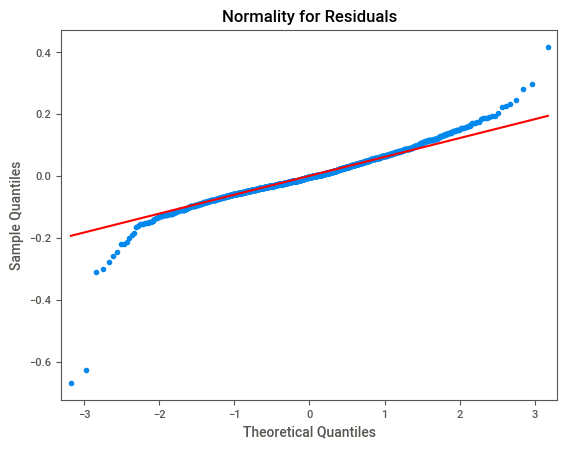

In [395]:
qqplot5=sm.qqplot(model5.resid,line='q')
plt.title("Normality for Residuals")
plt.show()

# Residuals Analysis


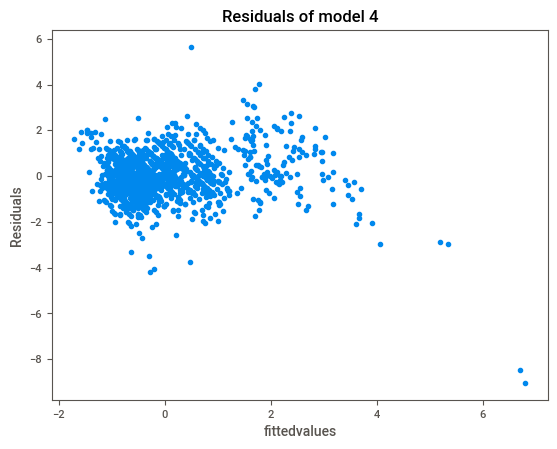

In [396]:
plt.scatter(get_standardized_values(model5.fittedvalues),
           get_standardized_values(model5.resid))
plt.title('Residuals of model 5')
plt.xlabel('fittedvalues')
plt.ylabel('Residuals')
plt.show()

# RMSE- Root Mean Squared Error


In [397]:
mse_m5= mean_squared_error(normdf.Price,model5.fittedvalues) #checking for RMSE value 
rmse_m5=math.sqrt(mse_m5)
print("the difference between actual and predicted values of model5 is :---",rmse_m5)


the difference between actual and predicted values of model5 is :--- 0.07397269075396108


# Model6 Creation by transforming datapoints using Square root

In [398]:
normdf1['Age_08_04']= np.sqrt(normdf['Age_08_04']) #tranforming data to inverse tan on  all the columns to avoid pattern in residuals vs fitted Values
normdf1['KM']=np.sqrt(normdf['KM'])
normdf1['HP']=np.sqrt(normdf['HP'])
normdf1['cc']=np.sqrt(normdf['cc'])
normdf1['Doors']=np.sqrt(normdf['Doors'])
normdf1['Weight']=np.sqrt(normdf['Weight'])

In [399]:
model6=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Weight',data=normdf1).fit()

In [400]:
model6.params

Intercept    0.950587
Age_08_04   -0.788111
KM          -0.192014
HP           0.086520
cc          -0.069075
Doors       -0.010918
Weight       0.268713
dtype: float64

In [401]:
model6.tvalues, '\n',model6.pvalues

(Intercept    50.752837
 Age_08_04   -44.746997
 KM          -11.831198
 HP            8.854752
 cc           -6.532137
 Doors        -1.022571
 Weight       12.926737
 dtype: float64,
 '\n',
 Intercept    8.673778e-313
 Age_08_04    4.702120e-267
 KM            9.011670e-31
 HP            2.639103e-18
 cc            9.224147e-11
 Doors         3.066979e-01
 Weight        4.399260e-36
 dtype: float64)

In [402]:
model6.rsquared

0.8529347172668793

# Residual Plot for Homoscedasticity


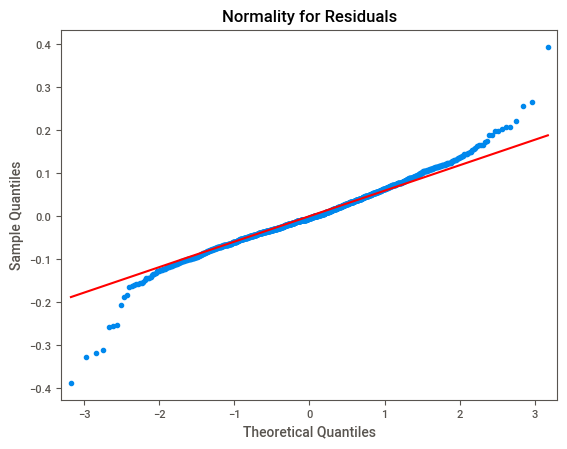

In [403]:
qqplot6=sm.qqplot(model6.resid,line='q')
plt.title("Normality for Residuals")
plt.show()

# Residuals Analysis


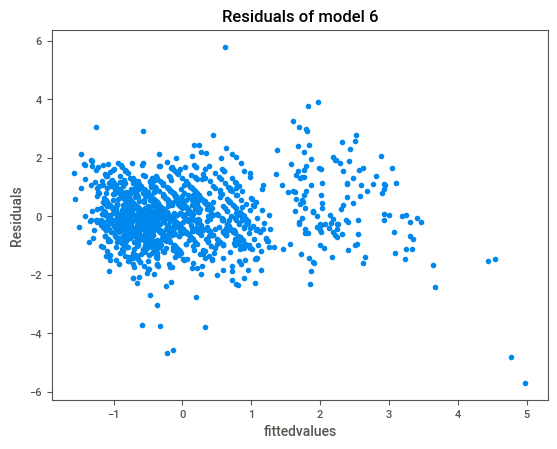

In [404]:
plt.scatter(get_standardized_values(model6.fittedvalues),
           get_standardized_values(model6.resid))
plt.title('Residuals of model 6')
plt.xlabel('fittedvalues')
plt.ylabel('Residuals')
plt.show()

# RMSE- Root Mean Squared Error


In [405]:
mse_m6= mean_squared_error(normdf.Price,model6.fittedvalues) #checking for RMSE value 
rmse_m6=math.sqrt(mse_m6)
print("the difference between actual and predicted values of model6 is :---",rmse_m6)


the difference between actual and predicted values of model6 is :--- 0.06803268499538716


In [407]:
print("Model1_Adjusted_Rsquared:",model.rsquared_adj,",","Model2_Adjusted_Rsquared:",model2.rsquared_adj,",","Model3_Adjusted_Rsquared:",model3.rsquared_adj,",","Model4_Adjusted_Rsquared:",model4.rsquared_adj,",","Model5_Adjusted_Rsquared:",model5.rsquared_adj,",","Model6_Adjusted_Rsquared:",model6.rsquared_adj)


Model1_Adjusted_Rsquared: 0.856330977361006 , Model2_Adjusted_Rsquared: 0.856400225990281 , Model3_Adjusted_Rsquared: 0.8626757998891732 , Model4_Adjusted_Rsquared: 0.8617151704749053 , Model5_Adjusted_Rsquared: 0.8253442414443717 , Model6_Adjusted_Rsquared: 0.8522677545333958


In [418]:
print("RMSE-Model1---",np.round(rmse_m1,4),",", "RMSE-Model 2---",np.round(rmse_m2,4), ",","RMSE-Model 3---", np.round(rmse_m3,4),",", "RMSE-Model4---", np.round(rmse_m4,4),",", "RMSE-Model5---", np.round(rmse_m5,4),",", "RMSE-Model6---", np.round(rmse_m6,4))


RMSE-Model1--- 0.0671 , RMSE-Model 2--- 0.0671 , RMSE-Model 3--- 0.0656 , RMSE-Model4--- 0.0658 , RMSE-Model5--- 0.074 , RMSE-Model6--- 0.068


In [420]:
RMSE=[rmse_m1,rmse_m2,rmse_m3,rmse_m4,rmse_m5,rmse_m6]
np.argmin(RMSE)

2